In [2]:
### Library Imports
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Function Imports
import sys
sys.path.append('/Users/mburley/TradingIndicators/Functions')  # Add the 'Functions' directory to the Python path
from IndicatorFunctions import import_stock_data, calculate_cci, plot_function


In [3]:
### Load in Stock Data
tickers = ['AAPL', 'GOOG']
start_date = '2024-01-01'
stock_data = import_stock_data(tickers, start_date)
stock_data

[*********************100%%**********************]  2 of 2 completed


Price        Date       Close                    High                     Low  \
Ticker                   AAPL        GOOG        AAPL        GOOG        AAPL   
0      2024-01-02  185.639999  139.559998  188.440002  140.615005  183.889999   
1      2024-01-03  184.250000  140.360001  185.880005  141.089996  183.429993   
2      2024-01-04  181.910004  138.039993  183.089996  140.634995  180.880005   
3      2024-01-05  181.179993  137.389999  182.759995  138.809998  180.169998   
4      2024-01-08  185.559998  140.529999  185.600006  140.639999  181.500000   
..            ...         ...         ...         ...         ...         ...   
77     2024-04-23  166.899994  159.919998  167.050003  160.479996  164.919998   
78     2024-04-24  169.020004  161.100006  169.300003  161.389999  166.210007   
79     2024-04-25  169.889999  157.949997  170.610001  158.279999  168.149994   
80     2024-04-26  169.300003  173.690002  171.339996  176.419998  169.179993   
81     2024-04-29  173.500000  167.899994  176.029999  171.380005  173.100006   

Price               
Ticker        GOOG  
0       137.740005  
1       138.429993  
2       138.009995  
3       136.850006  
4       137.880005  
..             ...  
77      157.964996  
78      158.820007  
79      152.768005  
80      171.399994  
81      167.059998  

[82 rows x 7 columns]

In [4]:
### Function to Calculate CCI
cci_df, cci_vals = calculate_cci(stock_data, window = 14)
print(cci_df.tail(5))
print("CCI values list: ", cci_vals)

Ticker        AAPL        GOOG
77      -76.199534   64.230651
78      -29.114988   75.578240
79        4.807208  -38.530058
80       13.270563  293.729232
81      111.800697  164.830172
CCI values list:  [111.80069687 164.83017173]


In [5]:
### Return CCI and Perform Filtering
# Set new filtered df to current rsi_df
cci_df_filtered = cci_df
# Filter based on constraints:
    # Below -100 - Oversold conditions, price has moved significantly below its average, suggesting a potential downtrend or extended period of weakness, generating a potential SELL signal
    # Above +100 - Overbought conditions, upward trend is beginning, generating a potential BUY signal
for ticker in cci_df.columns:
    if cci_df_filtered[ticker].iloc[-1] >= -100 and cci_df_filtered[ticker].iloc[-1] <= 100:
        del cci_df_filtered[ticker]

cci_df_filtered.tail()

Ticker,AAPL,GOOG
77,-76.199534,64.230651
78,-29.114988,75.578240
79,4.807208,-38.530058
80,13.270563,293.729232
81,111.800697,164.830172


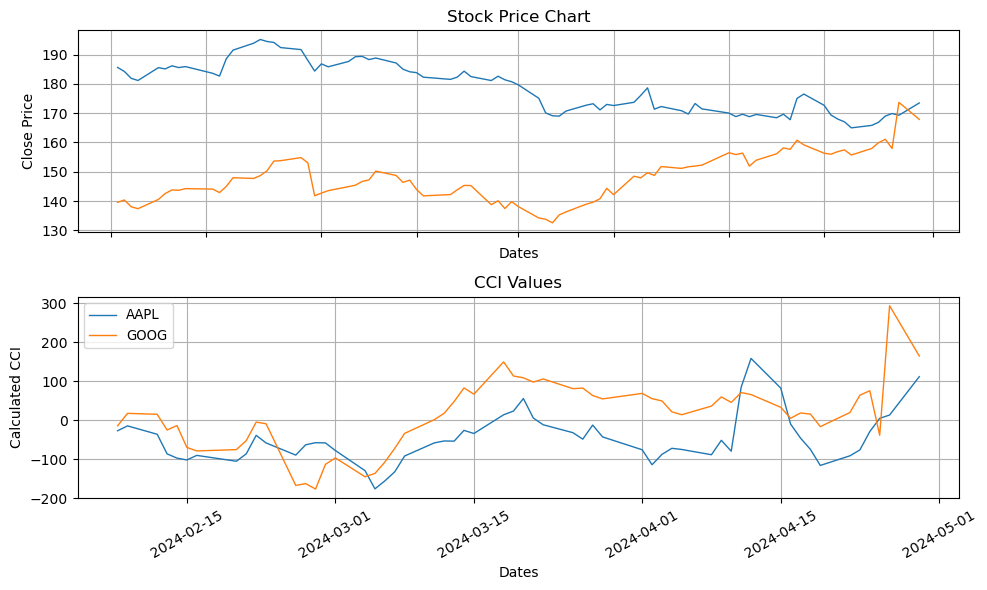

In [6]:
### Plot CCI
plot = plot_function(stock_data, cci_df, tickers, indicator_type = 'CCI')
plot
